In [26]:
#Importation des Libraries 
import os
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Importation du data

In [27]:
all_data = pd.read_excel(r'C:/Users/Dell/Desktop/ETL_Analysis/Mubawab_Vente.xlsx')

all_data.head()

,id,Title,Location,Price,Caractéristiques,Pieces,Description,Pictures,Télephone,Surface,City
0,2,Villa sur prestigia 570m² ville verte bouskoura,Bouskoura,7 800 000 DH,"['Jardin', 'Terrasse', 'Garage', 'Piscine', 'C...",570 m² 6 Pièces 4 Chambres 5 Salles de bains...,Villa située à Prestigia Ville Verte d'une sup...,['https://www.mubawab-media.com/ad/7/240/552F/...,06932XXXXX,570 m²,Bouskoura
1,3,Appartement 132m² aux portes californie,Quartier Bachkou à Casablanca,1 730 000 DH,"['Jardin', 'Garage', 'Ascenseur', 'Salon Maroc...",132 m² 4 Pièces 3 Chambres 2 Salles de bains...,Mets en vente un appt de 132m/carré au 7ième e...,['https://www.mubawab-media.com/ad/7/236/869F/...,06932XXXXX,132 m²,Casablanca
2,4,"Appartement de 122m² en vente, Le Prestige Cal...",Californie à Casablanca,1 712 000 DH,"['Climatisation', 'Cuisine équipée', 'Four']",122 m² 4 Pièces 3 Chambres 3 Salles de bains...,not defined,['https://www.mubawab-media.com/ad/6/982/147F/...,05200XXXXX,122 m²,Casablanca
3,5,Top affaire magnifique villa a vendre a Agdal ...,Route Amizmiz à Marrakech,2 990 000 DH,"['Jardin', 'Terrasse', 'Piscine']",250 m² 4 Pièces 3 Chambres 3 Salles de bains...,En plaçant votre future cadre de vie au cœur d...,['https://www.mubawab-media.com/ad/7/334/979F/...,06617XXXXX,250 m²,Marrakech
4,6,Les deux appartements à vendre à Hay Al Riyadh,Riyad à Rabat,2 300 000 DH,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",135 m² 4 Pièces 3 Chambres 3 Salles de bains...,mets en vente un appartements dans le quarti...,['https://www.mubawab-media.com/ad/7/403/364F/...,06624XXXXX,135 m²,Rabat


# Data Discription 

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1881 non-null   int64 
 1   Title             1881 non-null   object
 2   Location          1881 non-null   object
 3   Price             1881 non-null   object
 4   Caractéristiques  1881 non-null   object
 5   Pieces            1881 non-null   object
 6   Description       1881 non-null   object
 7   Pictures          1881 non-null   object
 8   Télephone         1881 non-null   object
 9   Surface           1881 non-null   object
 10  City              1881 non-null   object
dtypes: int64(1), object(10)
memory usage: 161.8+ KB


In [29]:
all_data.dtypes

id                   int64
Title               object
Location            object
Price               object
Caractéristiques    object
Pieces              object
Description         object
Pictures            object
Télephone           object
Surface             object
City                object
dtype: object

In [30]:
#Price Cleaning
all_data['Prix']=all_data['Price']
all_data.drop(all_data[all_data['Prix'] == 'notdefined'].index, inplace = True)
all_data.drop(all_data[all_data['Prix'] == 'not defined'].index, inplace = True)
all_data['Prix'] = all_data['Prix'].str.replace(r' DH','', regex=True)
all_data['Prix'] = all_data['Prix'].str.replace(r' EUR','', regex=True)
all_data['Prix'] = all_data['Prix'].str.replace(r' USD','', regex=True)

all_data['Prix']

0       7 800 000
1       1 730 000
2       1 712 000
3       2 990 000
4       2 300 000
          ...    
1871    7 000 000
1872      350 000
1874    2 400 000
1875    1 700 000
1878    1 120 000
Name: Prix, Length: 1593, dtype: object

In [31]:
all_data

,id,Title,Location,Price,Caractéristiques,Pieces,Description,Pictures,Télephone,Surface,City,Prix
0,2,Villa sur prestigia 570m² ville verte bouskoura,Bouskoura,7 800 000 DH,"['Jardin', 'Terrasse', 'Garage', 'Piscine', 'C...",570 m² 6 Pièces 4 Chambres 5 Salles de bains...,Villa située à Prestigia Ville Verte d'une sup...,['https://www.mubawab-media.com/ad/7/240/552F/...,06932XXXXX,570 m²,Bouskoura,7 800 000
1,3,Appartement 132m² aux portes californie,Quartier Bachkou à Casablanca,1 730 000 DH,"['Jardin', 'Garage', 'Ascenseur', 'Salon Maroc...",132 m² 4 Pièces 3 Chambres 2 Salles de bains...,Mets en vente un appt de 132m/carré au 7ième e...,['https://www.mubawab-media.com/ad/7/236/869F/...,06932XXXXX,132 m²,Casablanca,1 730 000
2,4,"Appartement de 122m² en vente, Le Prestige Cal...",Californie à Casablanca,1 712 000 DH,"['Climatisation', 'Cuisine équipée', 'Four']",122 m² 4 Pièces 3 Chambres 3 Salles de bains...,not defined,['https://www.mubawab-media.com/ad/6/982/147F/...,05200XXXXX,122 m²,Casablanca,1 712 000
3,5,Top affaire magnifique villa a vendre a Agdal ...,Route Amizmiz à Marrakech,2 990 000 DH,"['Jardin', 'Terrasse', 'Piscine']",250 m² 4 Pièces 3 Chambres 3 Salles de bains...,En plaçant votre future cadre de vie au cœur d...,['https://www.mubawab-media.com/ad/7/334/979F/...,06617XXXXX,250 m²,Marrakech,2 990 000
4,6,Les deux appartements à vendre à Hay Al Riyadh,Riyad à Rabat,2 300 000 DH,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",135 m² 4 Pièces 3 Chambres 3 Salles de bains...,mets en vente un appartements dans le quarti...,['https://www.mubawab-media.com/ad/7/403/364F/...,06624XXXXX,135 m²,Rabat,2 300 000
...,...,...,...,...,...,...,...,...,...,...,...,...
1871,1873,Villa de luxe Dar Bouazza,Dar Bouazza,7 000 000 DH,"['Jardin', 'Terrasse', 'Garage', 'Vue sur mer'...",609 m² 4 Pièces 3 Chambres 4 Salles de bains...,"Vente d'une villa d'exception. Vue mer, 3 cham...",['https://www.mubawab-media.com/ad/7/215/052F/...,06146XXXXX,609 m²,Dar Bouazza,7 000 000
1872,1874,Appartement meublée alliance bab sebta,Fnideq,350 000 DH,"['Concierge', 'Salon Marocain', 'Antenne parab...",56 m² 3 Pièces 2 Chambres 1 Salle de bain Bo...,"salon2 chambres a coucherSDBcuisine, appartem...",['https://www.mubawab-media.com/ad/7/268/131F/...,06613XXXXX,56 m²,Fnideq,350 000
1874,1876,Appartement à 50 m des Sœurettes,Racine à Casablanca,2 400 000 DH,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",126 m² 4 Pièces 2 Chambres 2 Salles de bains...,Vip Services Maroc met en vente cet appartemen...,['https://www.mubawab-media.com/ad/7/206/074F/...,06632XXXXX,126 m²,Casablanca,2 400 000
1875,1877,Opportunité à saisir sur Dar Bouazza,Dar Bouazza,1 700 000 DH,"['Jardin', 'Terrasse', 'Garage', 'Ascenseur', ...",161 m² 4 Pièces 2 Chambres 2 Salles de bains...,Vip Services Maroc met en vente ce magnifique ...,['https://www.mubawab-media.com/ad/7/229/388F/...,06632XXXXX,161 m²,Dar Bouazza,1 700 000


In [32]:
# # all_data['Price'] = all_data['Price'].str.replace(r' \x','', regex=True)

all_data['Prix'] = all_data['Prix'].str.replace('\xa0', '')
all_data['Prix'] = all_data['Prix'].str.replace('15000,1', '15000')
all_data['Prix'] = all_data['Prix'].str.replace('7\xa0800\xa0000', '')
all_data['Prix'] = all_data['Prix'].astype('int64')

all_data['Prix']
# all_data['Price'].astype(str).astype(int)
# all_data['Price'] = int(all_data['Price'])

0       7800000
1       1730000
2       1712000
3       2990000
4       2300000
         ...   
1871    7000000
1872     350000
1874    2400000
1875    1700000
1878    1120000
Name: Prix, Length: 1593, dtype: int64

In [33]:
all_data['outside'] = all_data['Surface']
all_data['outside'] = all_data['outside'].str.replace(r'm²','', regex=True)
all_data['outside'] = all_data['outside'].str.replace(r'Nouveau','', regex=True)

all_data['outside'] = all_data['outside'].str.replace(r'h0h0h0h0h0h0h0h','', regex=True)

# # all_data['Surface'] = all_data['Surface'].str.replace('', 'h')
# pd.to_numeric(all_data['Surface'], downcast='float')
# all_data['Surface'] = all_data['Surface'].astype('str').astype('float').astype('int64')

# all_data['Surface']

In [34]:
all_data.drop(all_data[all_data['outside'] == ''].index, inplace = True)
all_data.drop(all_data[all_data['outside'] == ' '].index, inplace = True)
all_data.drop(all_data[all_data['outside'] == '3 Pièces'].index, inplace = True)
all_data.drop(all_data[all_data['outside'] == '4 Pièces'].index, inplace = True)
all_data.drop(all_data[all_data['outside'] == '5 Pièces'].index, inplace = True)
all_data.drop(all_data[all_data['outside'] == '2 Pièces'].index, inplace = True)

all_data['outside'].head(11)

0     570 
1     132 
2     122 
3     250 
4     135 
5      97 
6     130 
7      72 
8     236 
9     237 
10    115 
Name: outside, dtype: object

In [35]:
all_data['outside'] = all_data['outside'].astype('int64')   
all_data['outside']

0       570
1       132
2       122
3       250
4       135
       ... 
1871    609
1872     56
1874    126
1875    161
1878     95
Name: outside, Length: 1591, dtype: int64

In [36]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1591 entries, 0 to 1878
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1591 non-null   int64 
 1   Title             1591 non-null   object
 2   Location          1591 non-null   object
 3   Price             1591 non-null   object
 4   Caractéristiques  1591 non-null   object
 5   Pieces            1591 non-null   object
 6   Description       1591 non-null   object
 7   Pictures          1591 non-null   object
 8   Télephone         1591 non-null   object
 9   Surface           1591 non-null   object
 10  City              1591 non-null   object
 11  Prix              1591 non-null   int64 
 12  outside           1591 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 174.0+ KB


In [37]:
all_data['Price/Surface']=all_data['Prix'] / all_data['outside']

all_data['Price/Surface'] = all_data['Price/Surface'].astype('int64')

all_data['City'] = all_data['City'].str.replace(' ', '')

all_data

,id,Title,Location,Price,Caractéristiques,Pieces,Description,Pictures,Télephone,Surface,City,Prix,outside,Price/Surface
0,2,Villa sur prestigia 570m² ville verte bouskoura,Bouskoura,7 800 000 DH,"['Jardin', 'Terrasse', 'Garage', 'Piscine', 'C...",570 m² 6 Pièces 4 Chambres 5 Salles de bains...,Villa située à Prestigia Ville Verte d'une sup...,['https://www.mubawab-media.com/ad/7/240/552F/...,06932XXXXX,570 m²,Bouskoura,7800000,570,13684
1,3,Appartement 132m² aux portes californie,Quartier Bachkou à Casablanca,1 730 000 DH,"['Jardin', 'Garage', 'Ascenseur', 'Salon Maroc...",132 m² 4 Pièces 3 Chambres 2 Salles de bains...,Mets en vente un appt de 132m/carré au 7ième e...,['https://www.mubawab-media.com/ad/7/236/869F/...,06932XXXXX,132 m²,Casablanca,1730000,132,13106
2,4,"Appartement de 122m² en vente, Le Prestige Cal...",Californie à Casablanca,1 712 000 DH,"['Climatisation', 'Cuisine équipée', 'Four']",122 m² 4 Pièces 3 Chambres 3 Salles de bains...,not defined,['https://www.mubawab-media.com/ad/6/982/147F/...,05200XXXXX,122 m²,Casablanca,1712000,122,14032
3,5,Top affaire magnifique villa a vendre a Agdal ...,Route Amizmiz à Marrakech,2 990 000 DH,"['Jardin', 'Terrasse', 'Piscine']",250 m² 4 Pièces 3 Chambres 3 Salles de bains...,En plaçant votre future cadre de vie au cœur d...,['https://www.mubawab-media.com/ad/7/334/979F/...,06617XXXXX,250 m²,Marrakech,2990000,250,11960
4,6,Les deux appartements à vendre à Hay Al Riyadh,Riyad à Rabat,2 300 000 DH,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",135 m² 4 Pièces 3 Chambres 3 Salles de bains...,mets en vente un appartements dans le quarti...,['https://www.mubawab-media.com/ad/7/403/364F/...,06624XXXXX,135 m²,Rabat,2300000,135,17037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,1873,Villa de luxe Dar Bouazza,Dar Bouazza,7 000 000 DH,"['Jardin', 'Terrasse', 'Garage', 'Vue sur mer'...",609 m² 4 Pièces 3 Chambres 4 Salles de bains...,"Vente d'une villa d'exception. Vue mer, 3 cham...",['https://www.mubawab-media.com/ad/7/215/052F/...,06146XXXXX,609 m²,DarBouazza,7000000,609,11494
1872,1874,Appartement meublée alliance bab sebta,Fnideq,350 000 DH,"['Concierge', 'Salon Marocain', 'Antenne parab...",56 m² 3 Pièces 2 Chambres 1 Salle de bain Bo...,"salon2 chambres a coucherSDBcuisine, appartem...",['https://www.mubawab-media.com/ad/7/268/131F/...,06613XXXXX,56 m²,Fnideq,350000,56,6250
1874,1876,Appartement à 50 m des Sœurettes,Racine à Casablanca,2 400 000 DH,"['Terrasse', 'Garage', 'Ascenseur', 'Concierge...",126 m² 4 Pièces 2 Chambres 2 Salles de bains...,Vip Services Maroc met en vente cet appartemen...,['https://www.mubawab-media.com/ad/7/206/074F/...,06632XXXXX,126 m²,Casablanca,2400000,126,19047
1875,1877,Opportunité à saisir sur Dar Bouazza,Dar Bouazza,1 700 000 DH,"['Jardin', 'Terrasse', 'Garage', 'Ascenseur', ...",161 m² 4 Pièces 2 Chambres 2 Salles de bains...,Vip Services Maroc met en vente ce magnifique ...,['https://www.mubawab-media.com/ad/7/229/388F/...,06632XXXXX,161 m²,DarBouazza,1700000,161,10559


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Prix'>

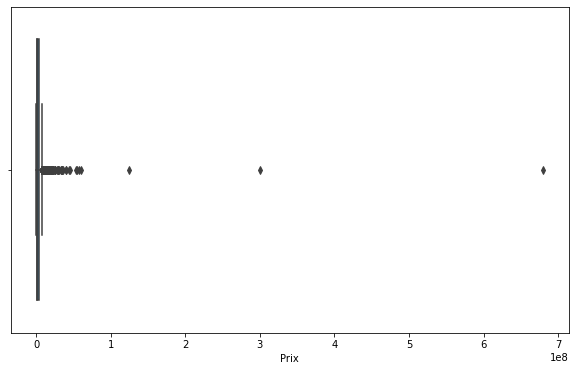

In [38]:
sns.boxplot(all_data['Prix'])

# Remove Outliers

In [39]:
Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(all_data < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))

id                   919.0
Prix             2840000.0
outside              241.5
Price/Surface       8048.5
dtype: float64
      Caractéristiques   City  Description  Location  Pictures  Pieces  Price  \
0                False  False        False     False     False   False  False   
1                False  False        False     False     False   False  False   
2                False  False        False     False     False   False  False   
3                False  False        False     False     False   False  False   
4                False  False        False     False     False   False  False   
...                ...    ...          ...       ...       ...     ...    ...   
1871             False  False        False     False     False   False  False   
1872             False  False        False     False     False   False  False   
1874             False  False        False     False     False   False  False   
1875             False  False        False     False     False   Fa

C:\Users\Dell\AppData\Local\Temp\ipykernel_11900\1008669579.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(all_data < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))


NameError: name 'boston_df_o1' is not defined

In [40]:
all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]
all_data.shape

C:\Users\Dell\AppData\Local\Temp\ipykernel_11900\3674634413.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]


(1310, 14)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='outside'>

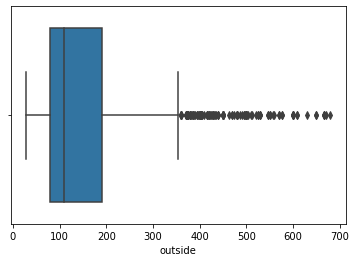

In [16]:

sns.boxplot(all_data['outside'])

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Prix'>

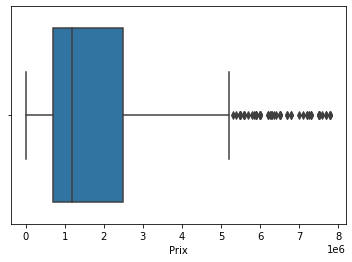

In [17]:
sns.boxplot(all_data['Prix'])

,sumsquare_error,aic,bic,kl_div
Prix,inf,inf,inf,inf
City,inf,inf,inf,inf
outside,inf,inf,inf,inf
Price/Surface,inf,inf,inf,inf


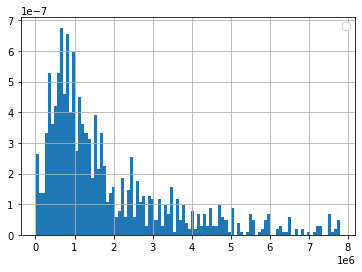

In [18]:
from fitter import Fitter, get_common_distributions, get_distributions
prix = all_data["Prix"].values

f = Fitter(prix, 
           distributions=['Prix',
                          'City',
                          "outside",
                          "Price/Surface"])
f.fit()
f.summary()

<AxesSubplot:>

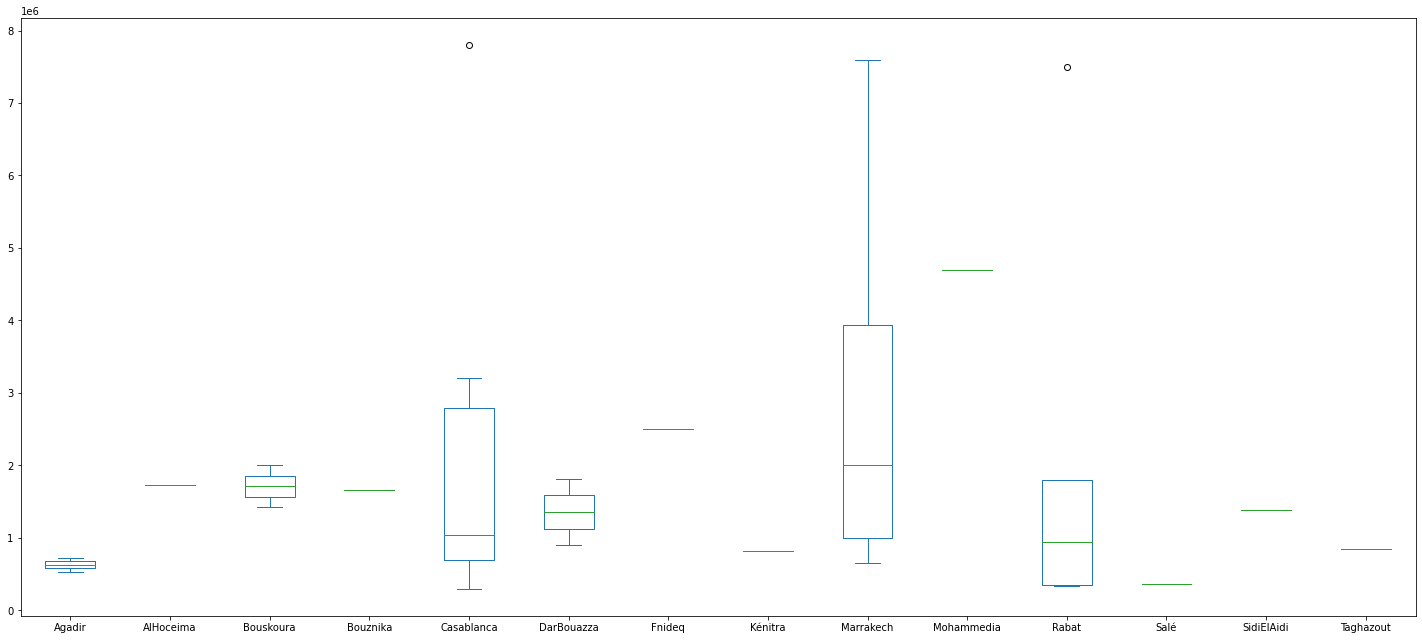

In [42]:
custom_df = all_data.loc[all_data['City'].isin([' '])]

new_df = pd.concat([all_data[:30], all_data[-30:], custom_df])
new_df.sort_values(by=['Prix'], inplace= True)
new_df.reset_index(drop=True, inplace= True)

all_dataDis = all_data.pivot_table(index='id', columns=new_df['City'], values='Prix')
all_dataDis.plot(kind='box', figsize=[25,11])

#  As you can see, it's visually simpler to compare many distributions with box plots. 


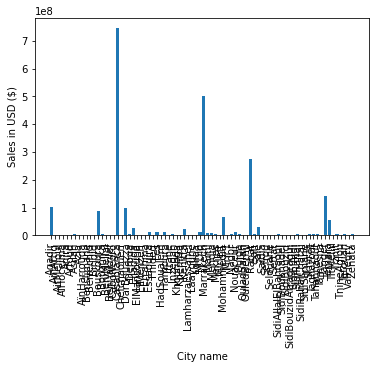

In [20]:


keys = [City for City, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Prix'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.rcParams['figure.figsize'] = (10,6)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

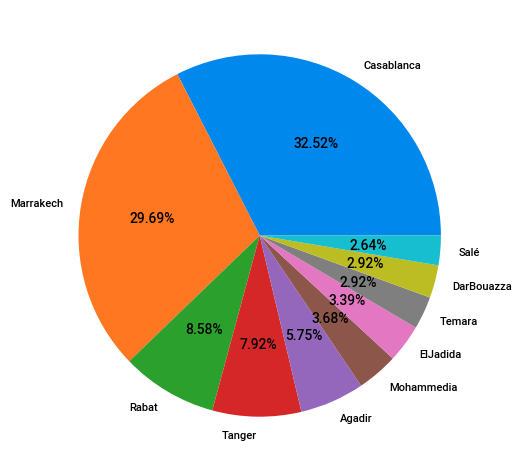

In [122]:
#Pourcentage de Vente dans chaque Ville 
city_name=all_data['City'].value_counts().index
city_val=all_data['City'].value_counts().values
plt.pie(city_val[:10],labels=city_name[:10],autopct='%1.2f%%')
plt.bar(keys,city_val.count()['Prix'])
plt.rcParams['figure.figsize'] = (10,6)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

In [123]:
# pip install sweetviz 
import sweetviz as sv 
report = sv.analyze(all_data)
report.show_html("./reportVenteMubawab.html")

                                             |                                             | [  0%]   00:00 ->…

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sweetviz\graph_asso

Report ./reportVenteMubawab.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


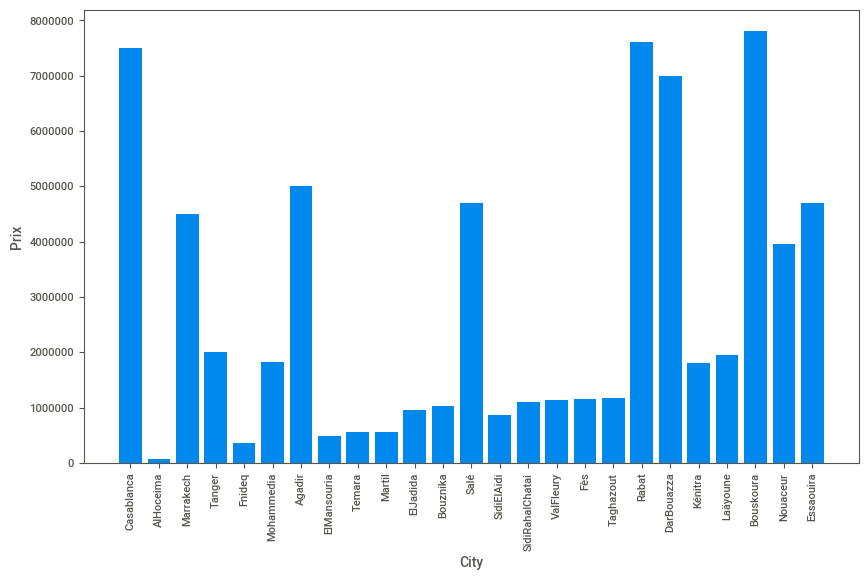

In [124]:
#PRIX & City 
custom_df = all_data.loc[all_data['City'].isin([''])]

# Create new df
new_df = pd.concat([all_data[:80], all_data[-80:], custom_df])
new_df.sort_values(by=['Prix'], inplace= True)
new_df.reset_index(drop=True, inplace= True)

# Creating the bar plot
plt.bar(new_df['City'], new_df['Prix'])
plt.xticks(rotation=90) 
plt.xlabel("City")
plt.ylabel("Prix") 
plt.rcParams['figure.figsize'] = (6,6)

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

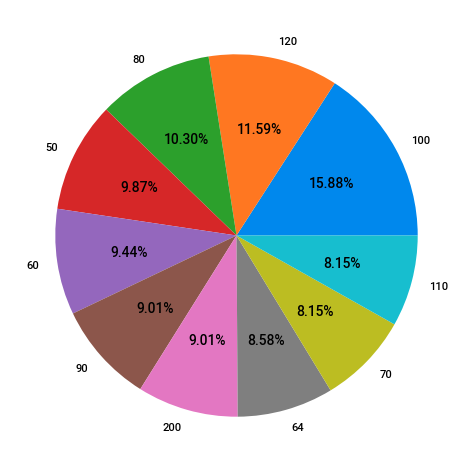

In [125]:
#Pris et surface 
city_name=all_data['outside'].value_counts().index
city_val=all_data['outside'].value_counts().values
#top 6 citys
plt.pie(city_val[:10],labels=city_name[:10],autopct='%1.2f%%')
#
plt.bar(keys,city_val.count()['Prix'])
plt.rcParams['figure.figsize'] = (10,6)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

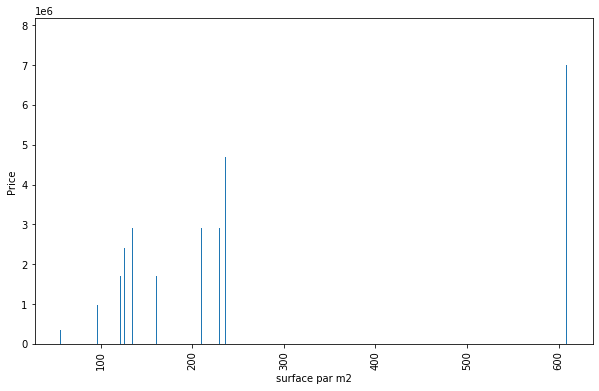

In [21]:

#Add custom entries here
custom_df = all_data.loc[all_data['outside'].isin([' '])]

# Create new df
new_df = pd.concat([all_data[:10], all_data[-10:], custom_df])
new_df.sort_values(by=['Prix'], inplace= True)
new_df.reset_index(drop=True, inplace= True)

# Creating the bar plot
plt.bar(new_df['outside'], new_df['Prix'])
plt.xticks(rotation=90) 
plt.xlabel("surface par m2")
plt.ylabel("Price") 
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

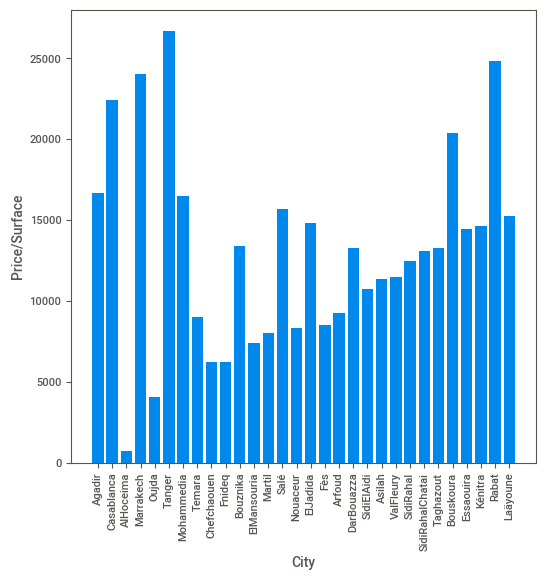

In [126]:
#Prix par metre2 dans chq ville  
custom_df = all_data.loc[all_data['City'].isin([' '])]

# Create new df
new_df = pd.concat([all_data[:100], all_data[-100:], custom_df])
new_df.sort_values(by=['Price/Surface'], inplace= True)
new_df.reset_index(drop=True, inplace= True)

# Creating the bar plot
plt.bar(new_df['City'], new_df['Price/Surface'])
plt.xticks(rotation=90) 
plt.xlabel("City")
plt.ylabel("Price/Surface") 
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Freq')

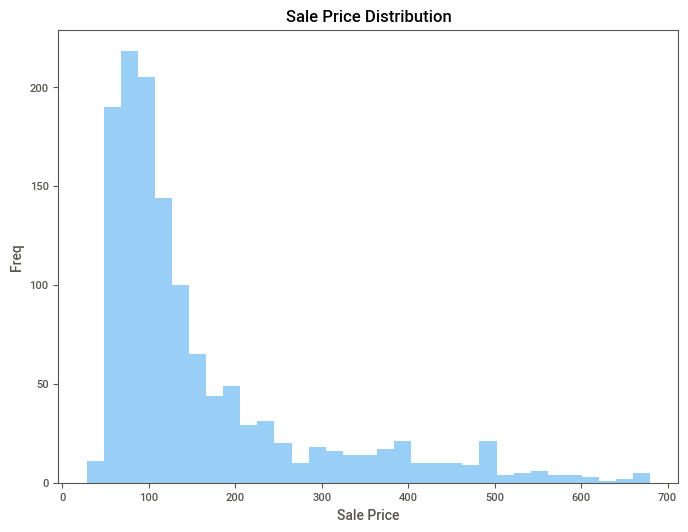

In [127]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(all_data['outside'],kde=False,ax=ax)
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Freq')

<AxesSubplot:xlabel='outside', ylabel='Prix'>

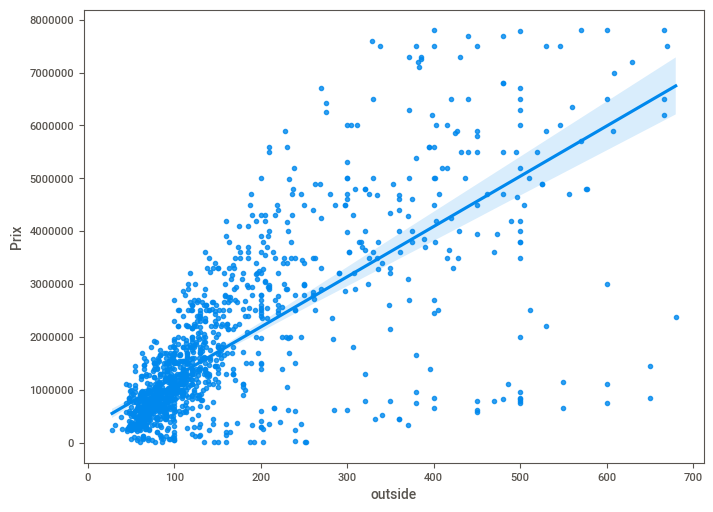

In [128]:
fig,ax = plt.subplots(figsize=(8,6))
sns.regplot(x = 'outside', y='Prix' , data=all_data,ax=ax)

In [129]:
all_data.shape

(1310, 14)

In [130]:
# all_data['City'].unique()

In [131]:
all_data.pivot_table(columns=['City'], aggfunc='size')

City
Agadir        61
AinAttig       1
AitMelloul     3
AlHoceima      3
Anjra          1
              ..
Tiznit         2
TnineAglou     1
Tétouan        7
ValFleury      1
Zenata         5
Length: 78, dtype: int64

In [132]:
data_sorted = all_data.sort_values(['outside'], ascending=True)
# data_sorted.to_excel(r'C:/Users/Dell/Desktop/ETL_Analysis/dataSorted_Vente.xlsx', index = False)

In [133]:
# all_data.groupby(['City']).count()

In [134]:
all_data.to_excel(r'C:/Users/Dell/Desktop/ETL_Analysis/Vente-sansOutliers.xlsx', index = False)

In [135]:
# clean_data = pd.read_excel(r'C:/Users/Dell/Desktop/ETL_Analysis/Vente-sansOutliers.xlsx')
# clean_data